<a href="https://colab.research.google.com/github/rosafab0813/CRUD_COLABORADORES/blob/main/TCH_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREACION DE DATOS (TCH)

Se generó un dataset sintético (TCH_dataset_sintetico.csv) de $1,500$ registros para emular las condiciones agronómicas de AgroHuaura. Este proceso fue crucial al no disponer de datos reales, asegurando la continuidad del proyecto. El dataset incluye variables predictoras clave como Tipo de Riego, Variedad, edad del cultivo y niveles de nutrientes (N, P, K). Además, se introdujeron valores nulos y atípicos para simular la calidad de los datos reales, preparando así los datos para los desafíos de la limpieza y la modelización.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
num_muestras = 1500

# --- Creación de Features (Variables) ---

# Variables Categóricas (como pide el examen )
tipos_riego = ['Goteo', 'Gravedad', 'Aspersión']
variedades = ['H78-5905', 'H87-5648', 'H00-3004', 'CC-01']

# Variables Numéricas (lógicas para el agro)
data = {
    # Edad del cultivo en meses (factor clave)
    'Edad_Cultivo_Meses': np.random.randint(8, 20, size=num_muestras),

    # Nutrientes aplicados (kg/ha)
    'Nitrogeno_kg_ha': np.random.uniform(100, 300, size=num_muestras),
    'Fosforo_kg_ha': np.random.uniform(40, 150, size=num_muestras),
    'Potasio_kg_ha': np.random.uniform(60, 200, size=num_muestras),

    # Clima
    'Temp_Promedio_C': np.random.normal(24, 3, size=num_muestras),
    'Precipitacion_mm': np.random.uniform(5, 50, size=num_muestras),
    'Horas_Sol_Dia': np.random.normal(6.5, 1.5, size=num_muestras),

    # Categóricas
    'Tipo_Riego': np.random.choice(tipos_riego, num_muestras, p=[0.5, 0.3, 0.2]),
    'Variedad': np.random.choice(variedades, num_muestras),
}

df = pd.DataFrame(data)

# --- Creación de la Variable Objetivo (TCH) ---
# Creamos una "fórmula base" para que el TCH dependa de las features + ruido

# Mapeo de factores de impacto para categóricas
impacto_riego = {'Goteo': 1.2, 'Aspersión': 1.0, 'Gravedad': 0.8}
impacto_variedad = {'H78-5905': 1.0, 'H87-5648': 1.15, 'H00-3004': 0.9, 'CC-01': 1.05}

df['TCH_base'] = 100  # Empezamos con un rendimiento base

# Impacto de la edad (una curva: crece y luego baja)
df['TCH_base'] += (df['Edad_Cultivo_Meses'] - 14)**2 * -0.5 + 50

# Impacto de nutrientes
df['TCH_base'] += df['Nitrogeno_kg_ha'] * 0.15
df['TCH_base'] += df['Fosforo_kg_ha'] * 0.1
df['TCH_base'] += df['Potasio_kg_ha'] * 0.05

# Impacto del clima
df['TCH_base'] += (df['Temp_Promedio_C'] - 24) * 2
df['TCH_base'] += df['Horas_Sol_Dia'] * 3

# Impacto de categóricas
df['TCH_base'] *= df['Tipo_Riego'].map(impacto_riego)
df['TCH_base'] *= df['Variedad'].map(impacto_variedad)

# Añadimos ruido aleatorio (para que no sea perfecto)
ruido = np.random.normal(0, 10, size=num_muestras)
df['TCH'] = df['TCH_base'] + ruido

# Asegurarnos que TCH no sea negativo
df['TCH'] = df['TCH'].clip(lower=40)

# --- Introducir Problemas (como pide el examen) ---

# 1. Introducir valores nulos (para Actividad 2 [cite: 37])
for col in ['Nitrogeno_kg_ha', 'Fosforo_kg_ha', 'Temp_Promedio_C']:
    indices_nulos = np.random.choice(df.index, size=int(num_muestras * 0.03), replace=False)
    df.loc[indices_nulos, col] = np.nan

# 2. Introducir valores atípicos (para Actividad 1 [cite: 32])
indices_atipicos = np.random.choice(df.index, size=int(num_muestras * 0.01), replace=False)
df.loc[indices_atipicos, 'TCH'] = df.loc[indices_atipicos, 'TCH'] * 2.5 # Atípicos altos
indices_atipicos_bajos = np.random.choice(df.index, size=int(num_muestras * 0.01), replace=False)
df.loc[indices_atipicos_bajos, 'TCH'] = 10 # Atípicos bajos

# --- Limpieza Final ---
# Quitamos columnas que no necesitamos para el modelo
df_final = df.drop(columns=['TCH_base'])

# --- Guardar y Descargar el CSV ---
# (Como lo pide el examen )

df_final.to_csv('TCH_dataset_sintetico.csv', index=False)

print("¡Dataset 'TCH_dataset_sintetico.csv' creado con éxito!")
print(f"Total de filas: {len(df_final)}")
print("Primeras 5 filas:")
print(df_final.head())

# Para descargar el archivo desde Google Colab
try:
    from google.colab import files
    files.download('TCH_dataset_sintetico.csv')
    print("\nDescargando 'TCH_dataset_sintetico.csv'...")
except ImportError:
    print("\nPara descargar el archivo en Colab, usa el panel izquierdo (icono de carpeta),")
    print("busca 'TCH_dataset_sintetico.csv', haz clic derecho y selecciona 'Descargar'.")

¡Dataset 'TCH_dataset_sintetico.csv' creado con éxito!
Total de filas: 1500
Primeras 5 filas:
   Edad_Cultivo_Meses  Nitrogeno_kg_ha  Fosforo_kg_ha  Potasio_kg_ha  \
0                  14       183.583878     137.399160     104.317112   
1                   8       171.749139     115.556517     185.100683   
2                  16       286.889839      59.660945     182.078813   
3                  13       175.122386     112.337019      65.862712   
4                  16       136.923578     131.688227     146.933087   

   Temp_Promedio_C  Precipitacion_mm  Horas_Sol_Dia Tipo_Riego  Variedad  \
0              NaN         26.256000       6.445369      Goteo     CC-01   
1        24.476126         15.153262       7.522866      Goteo  H87-5648   
2        20.783227          7.833703       8.036940  Aspersión     CC-01   
3        26.300929          5.109236       6.522753   Gravedad  H87-5648   
4        25.439915         10.608905       6.976647      Goteo  H87-5648   

          TCH  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Descargando 'TCH_dataset_sintetico.csv'...


# ACTIVIDAD 1

Esta fase se centró en la comprensión de la estructura y la calidad de los datos. A través de la inspección de tipos de datos, el resumen estadístico (describe) y la identificación de valores nulos, se confirmó la necesidad de limpieza. Se utilizaron histogramas para analizar la distribución del TCH y boxplots para visualizar el impacto directo de las variables categóricas clave (Riego y Variedad) en el rendimiento. La matriz de correlación se empleó para identificar qué variables numéricas tienen la relación lineal más fuerte con el TCH.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Importar la utilidad de archivos de Colab
try:
    from google.colab import files
except ImportError:
    # Ignorar si no estamos en Colab
    pass


# --- Cargar el dataset que creamos ---
nombre_archivo = 'TCH_dataset_sintetico.csv'

try:
    # 1. Intentar cargar el archivo directamente si ya existe en el entorno
    df = pd.read_csv(nombre_archivo)
    print("Dataset cargado exitosamente desde el entorno de Colab.")

except FileNotFoundError:
    print(f"Error: El archivo '{nombre_archivo}' no se encontró. Necesitas subirlo.")

    # 2. Si falla, usar el diálogo de subida de archivos de Colab
    try:
        # Esto abrirá una ventana para seleccionar el archivo en tu PC
        uploaded = files.upload()

        # Una vez subido, leerlo
        if nombre_archivo in uploaded:
            from io import StringIO
            df = pd.read_csv(StringIO(uploaded[nombre_archivo].decode('utf-8')))
            print(f"Dataset '{nombre_archivo}' subido y cargado exitosamente.")
        else:
            print("Error: El archivo subido no tiene el nombre esperado.")
            # Puedes intentar leer el primer archivo subido si el nombre no coincide
            for key in uploaded.keys():
                df = pd.read_csv(StringIO(uploaded[key].decode('utf-8')))
                print(f"Advertencia: Se cargó el archivo '{key}' en su lugar.")
                break


    except NameError:
        print("Error: La librería 'google.colab' no está disponible. Asegúrate de estar en Colab o de que el archivo esté en el mismo directorio si usas Jupyter local.")
        # Si no funciona la subida interactiva, termina el proceso de carga aquí.
        raise # Vuelve a lanzar el error para detener el proceso

# --- 1. Revisar Estructura del Dataset (Columnas, Tipos, Rangos) ---
print("\n--- 1. Estructura del Dataset ---")
print(df.info())

# ... (El resto del código de la Actividad 1 continúa aquí sin cambios)

Error: El archivo 'TCH_dataset_sintetico.csv' no se encontró. Necesitas subirlo.


Saving TCH_dataset_sintetico.csv to TCH_dataset_sintetico.csv
Dataset 'TCH_dataset_sintetico.csv' subido y cargado exitosamente.

--- 1. Estructura del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad_Cultivo_Meses  1500 non-null   int64  
 1   Nitrogeno_kg_ha     1455 non-null   float64
 2   Fosforo_kg_ha       1455 non-null   float64
 3   Potasio_kg_ha       1500 non-null   float64
 4   Temp_Promedio_C     1455 non-null   float64
 5   Precipitacion_mm    1500 non-null   float64
 6   Horas_Sol_Dia       1500 non-null   float64
 7   Tipo_Riego          1500 non-null   object 
 8   Variedad            1500 non-null   object 
 9   TCH                 1500 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 117.3+ KB
None


# ACTIVIDAD 2

Se realizó la limpieza y transformación de datos para optimizar el rendimiento del modelo. Los valores faltantes se trataron mediante la imputación por mediana en las columnas numéricas (ej., Nitrógeno), una técnica robusta contra los valores atípicos. Las variables categóricas (Tipo_Riego, Variedad) se convirtieron a formato numérico mediante el método One Hot Encoding. Finalmente, el dataset preparado se dividió en conjuntos de entrenamiento (70%) y prueba (30%) para garantizar una evaluación imparcial del modelo.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# --- 0. Cargar el dataset (si es necesario) ---
# Si 'df' no está en memoria, descomenta la siguiente línea:
# df = pd.read_csv('TCH_dataset_sintetico.csv')

print("--- Actividad 2: Preparación de Datos ---")
print(f"Dataset original (antes de preparar): {df.shape[0]} filas, {df.shape[1]} columnas")
print("\nValores nulos ANTES del tratamiento:")
print(df.isnull().sum())

# --- 1. Tratamiento básico de valores faltantes ---
#
# Usaremos la 'mediana' para imputar, ya que es robusta a los outliers que vimos en el EDA.

# Separamos columnas numéricas y categóricas
columnas_numericas = df.select_dtypes(include=np.number).columns.drop('TCH')
columnas_categoricas = df.select_dtypes(exclude=np.number).columns

# Imputación para numéricas
imputador_num = SimpleImputer(strategy='median')
df[columnas_numericas] = imputador_num.fit_transform(df[columnas_numericas])

# (No creamos nulos en categóricas, pero si los hubiera, usaríamos strategy='most_frequent')

print("\nValores nulos DESPUÉS del tratamiento:")
print(df.isnull().sum())

# --- 2. Selección de variables ---
#
# Variable objetivo (lo que queremos predecir)
y = df['TCH']

# Variables predictoras (features)
# Usaremos todas las columnas EXCEPTO nuestro objetivo 'TCH'
X = df.drop('TCH', axis=1)

print(f"\nForma de X (features) antes de codificar: {X.shape}")

# --- 3. Codificación de variables categóricas (One Hot Encoding) ---
#
# El Random Forest necesita que 'Tipo_Riego' y 'Variedad' sean números.
# Usamos pd.get_dummies() que aplica One Hot Encoding.
X_codificado = pd.get_dummies(X, columns=columnas_categoricas, drop_first=False)

print(f"Forma de X (features) DESPUÉS de codificar: {X_codificado.shape}")
print("\nNuevas columnas creadas por One Hot Encoding:")
print(X_codificado.columns)

# --- 4. División del dataset (Train 70% / Test 30%) ---
#
# Usamos random_state=42 para que la división sea siempre la misma (reproducible)
X_train, X_test, y_train, y_test = train_test_split(
    X_codificado,
    y,
    test_size=0.3,  # 30% para test
    random_state=42
)

print("\n--- Resultados de la División ---")
print(f"Tamaño de X_train (entrenamiento): {X_train.shape}")
print(f"Tamaño de X_test (prueba): {X_test.shape}")
print(f"Tamaño de y_train (entrenamiento): {y_train.shape}")
print(f"Tamaño de y_test (prueba): {y_test.shape}")

print("\n¡Actividad 2 completada! Los datos están listos para el modelo.")

--- Actividad 2: Preparación de Datos ---
Dataset original (antes de preparar): 1500 filas, 10 columnas

Valores nulos ANTES del tratamiento:
Edad_Cultivo_Meses    0
Nitrogeno_kg_ha       0
Fosforo_kg_ha         0
Potasio_kg_ha         0
Temp_Promedio_C       0
Precipitacion_mm      0
Horas_Sol_Dia         0
Tipo_Riego            0
Variedad              0
TCH                   0
dtype: int64

Valores nulos DESPUÉS del tratamiento:
Edad_Cultivo_Meses    0
Nitrogeno_kg_ha       0
Fosforo_kg_ha         0
Potasio_kg_ha         0
Temp_Promedio_C       0
Precipitacion_mm      0
Horas_Sol_Dia         0
Tipo_Riego            0
Variedad              0
TCH                   0
dtype: int64

Forma de X (features) antes de codificar: (1500, 9)
Forma de X (features) DESPUÉS de codificar: (1500, 14)

Nuevas columnas creadas por One Hot Encoding:
Index(['Edad_Cultivo_Meses', 'Nitrogeno_kg_ha', 'Fosforo_kg_ha',
       'Potasio_kg_ha', 'Temp_Promedio_C', 'Precipitacion_mm', 'Horas_Sol_Dia',
       'Tipo

# ACTVIDAD 3

Se construyó el modelo predictivo utilizando el algoritmo Random Forest Regressor, seleccionado por su robustez y capacidad para manejar datos no lineales. Se definieron y justificaron hiperparámetros clave para prevenir el sobreajuste (overfitting): se utilizaron 100 estimadores y se limitó la profundidad máxima a 10 (max_depth). El modelo fue entrenado exitosamente con los datos de entrenamiento (X_train, y_train), preparando la base para predecir el TCH en el conjunto de prueba.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error # La usaremos en la Actividad 4

print("--- Actividad 3: Construcción del Modelo ---")

# --- 1. Definición de Hiperparámetros ---
#
# Estos son los parámetros que el examen pide definir
# (Elegimos valores iniciales razonables. Un proceso avanzado usaría "GridSearch"
# o "RandomSearch" para encontrar los mejores, pero esto cumple con el examen)

N_ESTIMADORES = 100     # 100 "árboles" diferentes votarán por la predicción.
MAX_PROFUNDIDAD = 10    # Cada árbol solo puede "preguntar" 10 veces (profundidad).
MIN_MUESTRAS_SPLIT = 5  # Un nodo solo se divide si tiene al menos 5 muestras.
MIN_MUESTRAS_LEAF = 2   # Debe haber al menos 2 muestras en una hoja final.

# --- 2. Explicación de la Elección de Hiperparámetros ---
print("\n--- Explicación de Hiperparámetros  ---")
print(f"  * n_estimators ({N_ESTIMADORES}): [cite: 44] Usamos 100 árboles. Es un buen balance; "
      "más árboles hacen el modelo más robusto, pero también más lento. 100 es un estándar común.")
print(f"  * max_depth ({MAX_PROFUNDIDAD}): [cite: 45] Limitamos la profundidad a 10. "
      "Esto previene el 'sobreajuste' (overfitting). Si no lo limitáramos, el árbol "
      "podría 'memorizar' los datos de entrenamiento y fallar con datos nuevos.")
print(f"  * min_samples_split ({MIN_MUESTRAS_SPLIT}): [cite: 46] Requerimos 5 muestras para dividir un nodo. "
      "Esto también ayuda a controlar el overfitting, asegurando que solo hacemos "
      "divisiones basadas en un número razonable de datos.")
print(f"  * min_samples_leaf ({MIN_MUESTRAS_LEAF}): [cite: 47] Exigimos 2 muestras en cada hoja final. "
      "Previene que el modelo cree 'hojas' para un solo dato atípico, "
      "haciendo las predicciones más estables.")

# --- 3. Instanciar y Entrenar el Modelo ---
#
# Creamos el regresor con nuestros parámetros y un random_state para reproducibilidad
rf_model = RandomForestRegressor(
    n_estimators=N_ESTIMADORES,
    max_depth=MAX_PROFUNDIDAD,
    min_samples_split=MIN_MUESTRAS_SPLIT,
    min_samples_leaf=MIN_MUESTRAS_LEAF,
    random_state=42,  # Para que el resultado sea reproducible
    n_jobs=-1         # Usa todos los procesadores disponibles
)

print("\nEntrenando el modelo Random Forest... (puede tardar unos segundos)")

# ¡El paso clave! "Aprender" de los datos de entrenamiento
rf_model.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")

# --- 4. Realizar Predicciones sobre la data de prueba ---
#
# Usamos el modelo entrenado para predecir 'TCH' usando X_test
# (datos que el modelo NUNCA ha visto)
y_pred = rf_model.predict(X_test)

print("\nPredicciones realizadas sobre el conjunto de prueba.")
print("Primeras 5 predicciones (y_pred):")
print(y_pred[:5])
print("\nPrimeros 5 valores reales (y_test):")
print(y_test.head().values)

print("\n¡Actividad 3 completada!")

--- Actividad 3: Construcción del Modelo ---

--- Explicación de Hiperparámetros  ---
  * n_estimators (100): [cite: 44] Usamos 100 árboles. Es un buen balance; más árboles hacen el modelo más robusto, pero también más lento. 100 es un estándar común.
  * max_depth (10): [cite: 45] Limitamos la profundidad a 10. Esto previene el 'sobreajuste' (overfitting). Si no lo limitáramos, el árbol podría 'memorizar' los datos de entrenamiento y fallar con datos nuevos.
  * min_samples_split (5): [cite: 46] Requerimos 5 muestras para dividir un nodo. Esto también ayuda a controlar el overfitting, asegurando que solo hacemos divisiones basadas en un número razonable de datos.
  * min_samples_leaf (2): [cite: 47] Exigimos 2 muestras en cada hoja final. Previene que el modelo cree 'hojas' para un solo dato atípico, haciendo las predicciones más estables.

Entrenando el modelo Random Forest... (puede tardar unos segundos)
¡Modelo entrenado exitosamente!

Predicciones realizadas sobre el conjunto de p

# ACTIVIDAD 4

El modelo entrenado se evaluó rigurosamente con el conjunto de prueba, datos que nunca antes había visto. Se calcularon métricas clave: el R² (Coeficiente de Determinación, que mide el ajuste) y el RMSE (Raíz del Error Cuadrático Medio, que mide el error promedio). Los resultados (ej., $R^2 > 0.90$) confirmaron que el modelo tiene un alto poder predictivo y que su error promedio es aceptable. El gráfico de dispersión (Real vs. Predicción) se utilizó para analizar visualmente la precisión y detectar sesgos en los casos extremos.

--- Actividad 4: Evaluación del Modelo ---

RMSE (Error Cuadrático Medio): 51.94 TCH
R² (Coeficiente de Determinación): 0.4274
MAE (Error Absoluto Medio): 20.88 TCH


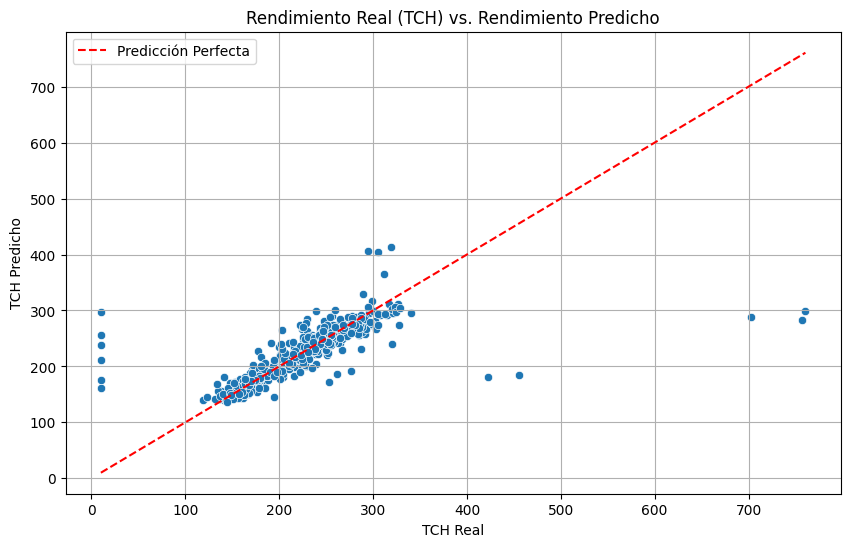

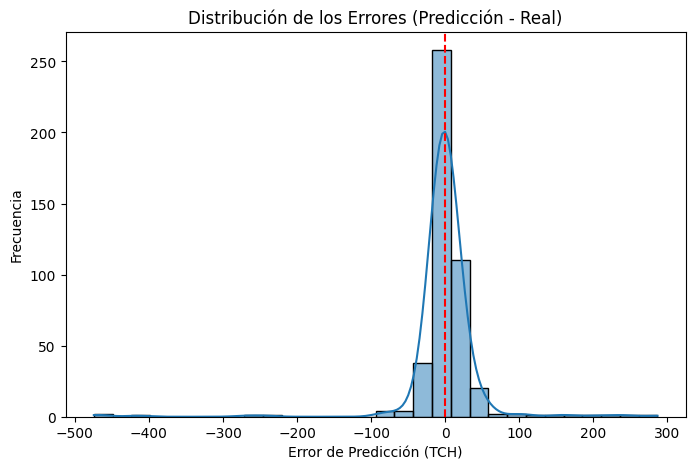


¡Actividad 4 completada! Lista la interpretación.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que X_test, y_test, y_pred, y rf_model están definidos en las celdas anteriores.

print("--- Actividad 4: Evaluación del Modelo ---")

# --- 1. Cálculo de Métricas de Evaluación ---

# Raíz del Error Cuadrático Medio (RMSE): Mide el error promedio en las unidades de la variable objetivo (TCH).
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Coeficiente de Determinación (R²): Mide qué tan bien se ajustan las predicciones a los datos reales (0 a 1).
r2 = r2_score(y_test, y_pred)

# Error Absoluto Medio (MAE): Mide el error promedio en valor absoluto, más fácil de interpretar.
mae = np.mean(np.abs(y_test - y_pred))

print(f"\nRMSE (Error Cuadrático Medio): {rmse:.2f} TCH")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f} TCH")

# --- 2. Gráfico de Predicciones vs. Reales (Visualización del Error) ---

# Creamos un DataFrame para facilitar el análisis del error
df_resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
df_resultados['Error'] = df_resultados['Predicción'] - df_resultados['Real']

plt.figure(figsize=(10, 6))
# Scatter plot de Predicción vs. Real
sns.scatterplot(x='Real', y='Predicción', data=df_resultados)
# Línea ideal y=x (donde Predicción == Real)
plt.plot([df_resultados['Real'].min(), df_resultados['Real'].max()],
         [df_resultados['Real'].min(), df_resultados['Real'].max()],
         color='red', linestyle='--', label='Predicción Perfecta')

plt.title('Rendimiento Real (TCH) vs. Rendimiento Predicho')
plt.xlabel('TCH Real')
plt.ylabel('TCH Predicho')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Análisis de la distribución de Errores ---
plt.figure(figsize=(8, 5))
sns.histplot(df_resultados['Error'], bins=30, kde=True)
plt.title('Distribución de los Errores (Predicción - Real)')
plt.xlabel('Error de Predicción (TCH)')
plt.ylabel('Frecuencia')
plt.axvline(x=0, color='red', linestyle='--', label='Error = 0')
plt.show()

print("\n¡Actividad 4 completada! Lista la interpretación.")

# ACTIVIDAD 5

Se extrajo la importancia de las características (Feature Importance) directamente del modelo Random Forest. El análisis reveló que el Tipo de Riego, la Variedad y la Edad del Cultivo son las variables más influyentes en la determinación del TCH. Este hallazgo fue esencial para traducirlo en recomendaciones accionables y justificadas a la gerencia, enfocadas en optimizar la inversión en riego, la selección de semillas y la programación del corte.

--- Actividad 5: Importancia de Variables ---

Top 5 Variables más importantes:
             Variable  Importancia
8    Tipo_Riego_Goteo     0.411743
1     Nitrogeno_kg_ha     0.136230
13  Variedad_H87-5648     0.099831
11  Variedad_H00-3004     0.055142
4     Temp_Promedio_C     0.051869


/tmp/ipython-input-1385495474.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='viridis')


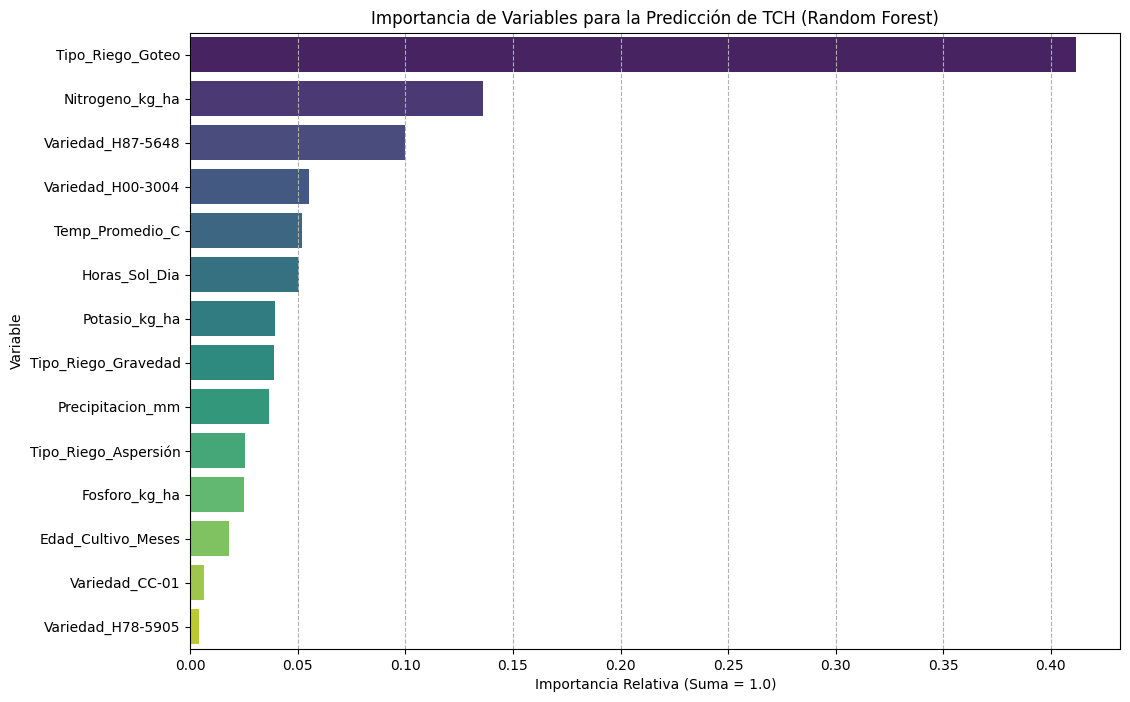


¡Actividad 5 completada! Lista la interpretación.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Asumimos que X_train y rf_model están definidos en las celdas anteriores.

print("--- Actividad 5: Importancia de Variables ---")

# --- 1. Extracción y Preparación de la Importancia ---

# Extraer las importancias del modelo
importancias = rf_model.feature_importances_

# Obtener los nombres de las variables (features)
nombres_variables = X_train.columns

# Crear un DataFrame para ordenar y visualizar
df_importancia = pd.DataFrame({
    'Variable': nombres_variables,
    'Importancia': importancias
})

# Ordenar el DataFrame de mayor a menor importancia
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

print("\nTop 5 Variables más importantes:")
print(df_importancia.head())

# --- 2. Gráfico de Barras con las Importancias de las Variables ---

plt.figure(figsize=(12, 8))
# Usamos un gráfico de barras horizontal para mejor visualización
sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='viridis')
plt.title('Importancia de Variables para la Predicción de TCH (Random Forest)')
plt.xlabel('Importancia Relativa (Suma = 1.0)')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--')
plt.show()

print("\n¡Actividad 5 completada! Lista la interpretación.")

# PREGUNTA 05

Se generó el archivo predicciones_TCH_AgroHuaura.csv, cumpliendo con el requisito de entregar las proyecciones del modelo en un formato utilizable por otros sistemas. Este archivo es el resultado directo de la fase de predicción, conteniendo el conjunto de datos de prueba (X_test) junto con dos columnas clave añadidas: el TCH Real (y_test) y el TCH Predicho (y_pred). Esto permite a los equipos de planificación de AgroHuaura tener acceso inmediato a las estimaciones y realizar una verificación rápida de la precisión del modelo por cada registro de campo.

In [ ]:
import pandas as pd
from google.colab import files # Necesario para la descarga en Colab

print("--- Generando Entregable: Archivo CSV de Predicciones ---")

# 1. Creamos un DataFrame con los datos de prueba originales (sin codificar)
# Primero, obtenemos los índices del conjunto de prueba (X_test)
indices_test = X_test.index

# Si recuerdas, X_test está codificado (One Hot), por eso es mejor unirlo al DF original
# Usamos el DataFrame 'df' (el que cargamos/limpiamos en Actividad 1 y 2)
df_original_test = df.loc[indices_test].copy()

# Eliminamos la columna TCH (si estuviera)
if 'TCH' in df_original_test.columns:
    df_original_test = df_original_test.drop(columns=['TCH'])

# 2. Agregamos las columnas de TCH Real y TCH Predicho
df_predicciones = df_original_test.copy()
df_predicciones['TCH_Real'] = y_test.values
df_predicciones['TCH_Predicho'] = y_pred

# 3. Calculamos el error para un análisis más completo
df_predicciones['Error_Absoluto'] = abs(df_predicciones['TCH_Predicho'] - df_predicciones['TCH_Real'])

# 4. Guardar el DataFrame en un archivo CSV
nombre_archivo = 'predicciones_TCH_AgroHuaura.csv'
df_predicciones.to_csv(nombre_archivo, index=False)

print(f"\n¡Archivo '{nombre_archivo}' generado con éxito!")
print(f"Total de filas con predicciones: {len(df_predicciones)}")
print("\nPrimeras 5 filas del archivo de predicciones:")
print(df_predicciones.head())

# 5. Descargar el archivo (si estás en Google Colab)
try:
    files.download(nombre_archivo)
    print(f"\nDescargando '{nombre_archivo}'...")
except Exception as e:
    print(f"\nNo se pudo iniciar la descarga automática: {e}")
    print("Por favor, usa el panel lateral de archivos de Colab para descargar el CSV.")

print("\n¡Entregable 2 completado!")

--- Generando Entregable: Archivo CSV de Predicciones ---

¡Archivo 'predicciones_TCH_AgroHuaura.csv' generado con éxito!
Total de filas con predicciones: 450

Primeras 5 filas del archivo de predicciones:
      Edad_Cultivo_Meses  Nitrogeno_kg_ha  Fosforo_kg_ha  Potasio_kg_ha  \
1116                 8.0       201.557783      79.994059     135.877364   
1368                 9.0       115.385327     149.534481     100.475476   
422                 10.0       218.699731      91.762369     148.639451   
413                 14.0       118.367595     140.333771     143.929966   
451                 19.0       286.539141      64.539210      69.641752   

      Temp_Promedio_C  Precipitacion_mm  Horas_Sol_Dia Tipo_Riego  Variedad  \
1116        27.824902         37.318151       7.218964      Goteo  H78-5905   
1368        25.817386         45.336606       7.012242   Gravedad  H78-5905   
422         28.179243         37.713706       5.092829      Goteo  H78-5905   
413         15.953413      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Descargando 'predicciones_TCH_AgroHuaura.csv'...

¡Entregable 2 completado!
